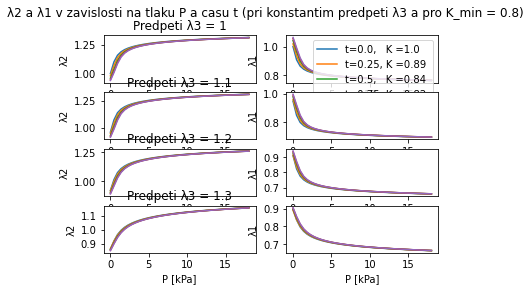

In [1]:
from scipy.optimize import fsolve
from sympy import symbols, exp, sin, cos, diff
import math
import numpy as np
import matplotlib.pyplot as plt

# 8R - nejpodobnejsi tenkostenne nadobe
gamma = math.radians(42.71) #[rad]
R = 3.44
H = 3.76-R
c0 = 11.23
c11 = 6.12
c12 = 14.17
c21 = 12.71
c22 = 6.61
c31 = 9.27
c41 = 9.27
c32 = 16.16
c42 = 16.16

# # model 10L ... nejpoddanejsi
# gamma = math.radians(44.81) #[rad]
# R = 2.24
# H = 2.66-R
# c0 = 30.1
# c11 = 13.73
# c12 = 0.16
# c21 = 8.16
# c22 = 0.47
# c31 = 3.17
# c41 = 3.17
# c32 = 1.20
# c42 = 1.20

l1s, l2s, l3s = symbols('l1s, l2s, l3s')
Ic = l1s**2+l2s**2+l3s**2
I14 = l3s**2
I24 = l2s**2
I34 = (l3s**2)*(cos(gamma))**2+(l2s**2)*(sin(gamma))**2
I44 = (l3s**2)*(cos(gamma))**2+(l2s**2)*(sin(gamma))**2
Wp = (c0/2)*(Ic-3)+ (c11/(4*c12))*(exp(c12*(I14-1)**2)-1)+ (c21/(4*c22))*(exp(c22*(I24-1)**2)-1)+ (c31/(4*c32))*(exp(c32*(I34-1)**2)-1)+ (c41/(4*c42))*(exp(c42*(I44-1)**2)-1)
dWp_l1s = diff(Wp,l1s)
dWp_l2s = diff(Wp,l2s)
dWp_l3s = diff(Wp,l3s)

K_min = 0.8
alfa = 3

def eq1(l2, l3, P, t):
    Ca_max = 20

    fi_p = 0.6
    fi_a = 0.4

    Ca = Ca_max * (1 - math.exp(-alfa * t))
    K = 1 - (1 - K_min) * (1 - math.exp(-alfa * t))
    l2_a = l2 / K
    l1 = 1/(l2*l3)
    dwp_l1 = dWp_l1s.subs(l1s,l1).subs(l2s,l2).subs(l3s,l3)
    dwp_l2 = dWp_l2s.subs(l1s,l1).subs(l2s,l2).subs(l3s,l3)
    dwa_l2a = Ca*(2*l2_a - 2)
    p = fi_p * l1 * dwp_l1
    r = l2*R
    h = l1*H
    s2 = (fi_p * l2 * dwp_l2 + fi_a * l2_a * dwa_l2a - p)

    return s2-P*r/h

def eq2(l2, l3, P, Fred):
    fi_p = 0.6

    l1 = 1/(l2*l3)
    dwp_l1 = dWp_l1s.subs(l1s,l1).subs(l2s,l2).subs(l3s,l3)
    dwp_l3 = dWp_l3s.subs(l1s,l1).subs(l2s,l2).subs(l3s,l3)
    p = fi_p * l1 * dwp_l1
    r = l2*R
    h = l1*H
    s3 = fi_p * l3 * dwp_l3 - p

    return s3-Fred/(2*math.pi*r*h)-r*P/(2*h)

P = np.linspace(0,18,num=40)
Np = len(P)
t = np.linspace(0,1,num=5)
Nt = len(t)
l3 = np.linspace(1,1.3,num=4)
Nl3 = len(l3)
root = np.zeros((Nl3,Nt,Np,2))
lam1 = np.zeros((Nl3,Nt,Np,1))
FredVal = np.zeros((Nl3,Nt,Np,1))

pp = 0
tt = 0
ll3 = 0
for k in l3:
    for j in t:
        for i in P:
            def fun_root(x):

                return [eq1(x[0],k,i,j),
                        eq2(x[0],k,i,x[1])]
            root[ll3,tt,pp,:] = fsolve(fun_root, [1.3,-50])
            lam1[ll3,tt,pp] = 1/(root[ll3,tt,pp,0]*k)
            FredVal[ll3,tt,pp] = root[ll3,tt,pp,1]
            pp += 1

        tt += 1
        pp = pp-Np
    ll3 += 1
    tt = tt-Nt

# print(FredVal)

Kval = np.zeros((5))
ii = 0
for i in t:
    Kval[ii] = 1 - (1 - K_min) * (1 - math.exp(-alfa * i))
    ii += 1


fig, axs = plt.subplots(Nl3,2)
fig.suptitle('λ2 a λ1 v zavislosti na tlaku P a casu t (pri konstantim predpeti λ3 a pro K_min = '+str(K_min)+ ')')
# prvni graf
axs[0,0].plot(P,root[0,0,:,0], label="t=0,    K=" +str(round(Kval[0],2))+ " ")
axs[0,0].plot(P,root[0,1,:,0], label="t=0.25,K=" +str(round(Kval[1],2))+ " ")
axs[0,0].plot(P,root[0,2,:,0], label="t=0.5,K=" +str(round(Kval[2],2))+ " ")
axs[0,0].plot(P,root[0,3,:,0], label="t=0.75,K=" +str(round(Kval[3],2))+ " ")
axs[0,0].plot(P,root[0,4,:,0], label="t=1,   K=" +str(round(Kval[4],2))+ " ")

axs[0,1].plot(P,lam1[0,0,:], label="t="+str(t[0])+",   K ="+str(round(Kval[0],2))+ " ")
axs[0,1].plot(P,lam1[0,1,:], label="t="+str(t[1])+", K ="+str(round(Kval[1],2))+ " ")
axs[0,1].plot(P,lam1[0,2,:], label="t="+str(t[2])+",   K ="+str(round(Kval[2],2))+ " ")
axs[0,1].plot(P,lam1[0,3,:], label="t="+str(t[3])+", K ="+str(round(Kval[3],2))+ " ")
axs[0,1].plot(P,lam1[0,4,:], label="t="+str(t[4])+",   K ="+str(round(Kval[4],2))+ " ")

axs[0,0].set(xlabel='', ylabel="λ2")
axs[0,1].set(xlabel=' ', ylabel='λ1')
axs[0,1].legend(loc="upper right")
# axs[0,1].legend(loc="upper left")
axs[0, 0].set_title('Predpeti λ3 = 1')

#druhy graf
axs[1,0].plot(P,root[1,0,:,0], label="t=0,     K=" +str(round(Kval[0],2))+ " ")
axs[1,0].plot(P,root[1,1,:,0], label="t=0.25,K=" +str(round(Kval[1],2))+ " ")
axs[1,0].plot(P,root[1,2,:,0], label="t=0.5,  K=" +str(round(Kval[2],2))+ " ")
axs[1,0].plot(P,root[1,3,:,0], label="t=0.75,K=" +str(round(Kval[3],2))+ " ")
axs[1,0].plot(P,root[1,4,:,0], label="t=1,     K=" +str(round(Kval[4],2))+ " ")

axs[1,1].plot(P,lam1[1,0,:], label="t=0,     K=" +str(round(Kval[0],2))+ " ")
axs[1,1].plot(P,lam1[1,1,:], label="t=0.25,K=" +str(round(Kval[1],2))+ " ")
axs[1,1].plot(P,lam1[1,2,:], label="t=0.5,  K=" +str(round(Kval[2],2))+ " ")
axs[1,1].plot(P,lam1[1,3,:], label="t=0.75,K=" +str(round(Kval[3],2))+ " ")
axs[1,1].plot(P,lam1[1,4,:], label="t=1,     K=" +str(round(Kval[4],2))+ " ")

axs[1,0].set(xlabel='', ylabel="λ2")
axs[1,1].set(xlabel=' ', ylabel='λ1')
# axs[1,0].legend(loc="upper left")
# axs[1,1].legend(loc="upper left")
axs[1, 0].set_title('Predpeti λ3 = 1.1')

#treti
axs[2,0].plot(P,root[2,0,:,0], label="t=0,     K=" +str(round(Kval[0],2))+ " ")
axs[2,0].plot(P,root[2,1,:,0], label="t=0.25,K=" +str(round(Kval[1],2))+ " ")
axs[2,0].plot(P,root[2,2,:,0], label="t=0.5,  K=" +str(round(Kval[2],2))+ " ")
axs[2,0].plot(P,root[2,3,:,0], label="t=0.75,K=" +str(round(Kval[3],2))+ " ")
axs[2,0].plot(P,root[2,4,:,0], label="t=1,     K=" +str(round(Kval[4],2))+ " ")

axs[2,1].plot(P,lam1[2,0,:], label="t=0,     K=" +str(round(Kval[0],2))+ " ")
axs[2,1].plot(P,lam1[2,1,:], label="t=0.25,K=" +str(round(Kval[1],2))+ " ")
axs[2,1].plot(P,lam1[2,2,:], label="t=0.5,  K=" +str(round(Kval[2],2))+ " ")
axs[2,1].plot(P,lam1[2,3,:], label="t=0.75,K=" +str(round(Kval[3],2))+ " ")
axs[2,1].plot(P,lam1[2,4,:], label="t=1,     K=" +str(round(Kval[4],2))+ " ")

axs[2, 0].set_title('Predpeti λ3 = 1.2')
axs[2,0].set(xlabel='', ylabel="λ2")
axs[2,1].set(xlabel=' ', ylabel='λ1')
# axs[2,0].legend(loc="upper left")
# axs[2,1].legend(loc="upper left")

#ctvrty
axs[3,0].plot(P,root[3,0,:,0], label="t=0,     K=" +str(round(Kval[0],2))+ " ")
axs[3,0].plot(P,root[3,1,:,0], label="t=0.25,K=" +str(round(Kval[1],2))+ " ")
axs[3,0].plot(P,root[3,2,:,0], label="t=0.5,  K=" +str(round(Kval[2],2))+ " ")
axs[3,0].plot(P,root[3,3,:,0], label="t=0.75,K=" +str(round(Kval[3],2))+ " ")
axs[3,0].plot(P,root[3,4,:,0], label="t=1,     K=" +str(round(Kval[4],2))+ " ")

axs[3,1].plot(P,lam1[3,0,:], label="t=0,     K=" +str(round(Kval[0],2))+ " ")
axs[3,1].plot(P,lam1[3,1,:], label="t=0.25,K=" +str(round(Kval[1],2))+ " ")
axs[3,1].plot(P,lam1[3,2,:], label="t=0.5,  K=" +str(round(Kval[2],2))+ " ")
axs[3,1].plot(P,lam1[3,3,:], label="t=0.75,K=" +str(round(Kval[3],2))+ " ")
axs[3,1].plot(P,lam1[3,4,:], label="t=1,     K=" +str(round(Kval[4],2))+ " ")

axs[3, 0].set_title('Predpeti λ3 = 1.3')
axs[3,0].set(xlabel='P [kPa]', ylabel="λ2")
axs[3,1].set(xlabel='P [kPa]', ylabel="λ1")
# axs[3,0].legend(loc="upper left")
# axs[3,1].legend(loc="upper left")

plt.show()
###################################################
# ax1.set(xlabel=' ', ylabel='λ2')
# ax1.legend(loc="upper left")
# ax1.xlabel('Tlak [kPa]')
# ax1.ylabel('λ2')
# ax2.set(xlabel='tlak [kPa]', ylabel='λ1')
# ax2.legend(loc="upper left")
###################################################
# pptt1 = 0
# ppt2 = 0
# root_t1 = np.zeros((Np,2))
# root_t2 = np.zeros((Np,2))
# print(fun_root(root[0], 1.1, 10, root[1]))
# for i in P:
#     def fun_root_t1(x):
#         l3 = 1.0
#         t = 0
#         return [eq1(x[0],l3,i,t),
#                 eq2(x[0],l3,i,x[1])]
#
#     root_t1[ppt1,:] = fsolve(fun_root_t1, [1,-400])
#     ppt1 += 1
#
# for i in P:
#     def fun_root_t2(x):
#         l3 = 1.0
#         t = 0.1
#         return [eq1(x[0],l3,i,t),
#                 eq2(x[0],l3,i,x[1])]
#
#     root_t2[ppt2,:] = fsolve(fun_root_t2, [1,-400])
#     ppt2 += 1

# plt.plot(P,root_t1[:,0])
# plt.plot(P,root_t2[:,0])
# plt.xlabel('Tlak [kPa]')
# plt.ylabel('λ2')
# plt.show()

